In [3]:
import arviz as az
import pandas as pd
import xarray as xr
import numpy as np
import pickle

import plotly.express as px


from https://python.arviz.org/en/stable/getting_started/CreatingInferenceData.html

https://oriolabrilpla.cat/en/blog/posts/2020/plot-trace.html

In [5]:
with open('fit_music_sum.pkl', 'rb') as f:
    fit= pickle.load(f)
    summary_sum = az.summary(fit)
print(summary_sum)

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


                    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
inttitlepow[0, 0]  0.026  0.012   0.004    0.049      0.000    0.000   
inttitlepow[0, 1]  0.001  0.001   0.000    0.004      0.000    0.000   
inttitlepow[0, 2]  0.000  0.000   0.000    0.001      0.000    0.000   
inttitlepow[0, 3]  0.000  0.000   0.000    0.001      0.000    0.000   
inttitlepow[0, 4]  0.000  0.000   0.000    0.001      0.000    0.000   
...                  ...    ...     ...      ...        ...      ...   
indivisual[582]    0.280  0.077   0.140    0.422      0.001    0.001   
mu_t               0.076  0.008   0.061    0.091      0.000    0.000   
mu_i               0.372  0.048   0.285    0.465      0.001    0.001   
sigma_t            0.057  0.006   0.046    0.068      0.000    0.000   
sigma_i            0.298  0.041   0.219    0.372      0.001    0.001   

                   ess_bulk  ess_tail  r_hat  
inttitlepow[0, 0]    7464.0    2614.0    1.0  
inttitlepow[0, 1]    9117.0    3956.0    

In [ ]:
summary_sum.to_csv("data/summary_music_sum.csv")

In [11]:
summary_sum=summary_sum.filter(like='indivisual', axis=0)

music_points_ratio=pd.read_csv("data/music_point_ratio_sort.csv")

summary_sum["名前"]=music_points_ratio["Track Name"].values
summary_sum_sort=summary_sum.sort_values(by="mean")
summary_sum_sort

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
indivisual[40]    0.014  0.009   0.000    0.029      0.000    0.000    1800.0   
indivisual[175]   0.015  0.010   0.000    0.032      0.000    0.000    2720.0   
indivisual[285]   0.020  0.010   0.001    0.038      0.000    0.000    3058.0   
indivisual[355]   0.024  0.007   0.011    0.038      0.000    0.000   13364.0   
indivisual[360]   0.026  0.008   0.011    0.041      0.000    0.000   11835.0   
...                 ...    ...     ...      ...        ...      ...       ...   
indivisual[563]  17.056  1.166  14.950   19.328      0.013    0.009    7586.0   
indivisual[76]   17.825  1.085  15.719   19.819      0.013    0.009    7410.0   
indivisual[75]   21.363  1.204  19.140   23.685      0.016    0.011    5986.0   
indivisual[0]    26.810  1.338  24.271   29.273      0.018    0.012    5792.0   
indivisual[1]    27.725  1.332  25.257   30.198      0.017    0.012    5795.0   

                 ess_tail  r_hat                            名前  
indivisual[40]     2641.0    1.0                        恋色マジック  
indivisual[175]    2881.0    1.0  Highly Responsive to Prayers  
indivisual[285]    2394.0    1.0                       ゲームオーバー  
indivisual[355]    5210.0    1.0                  可愛い大戦争のリフレーン  
indivisual[360]    5519.0    1.0                     閉ざせし雲の通い路  
...                   ...    ...                           ...  
indivisual[563]    5799.0    1.0                    スモーキングドラゴン  
indivisual[76]     5049.0    1.0                     ネクロファンタジア  
indivisual[75]     5276.0    1.0                   幽雅に咲かせ、墨染の桜  
indivisual[0]      5591.0    1.0                  亡き王女の為のセプテット  
indivisual[1]      5407.0    1.0               U.N.オーエンは彼女なのか？  

[583 rows x 10 columns]

In [17]:
summary_sum_sort[summary_sum_sort["名前"].isin("偶像")]

AttributeError: 'StringMethods' object has no attribute 'isin'

In [15]:
fig = px.bar(summary_sum_sort, y='名前', x='mean',orientation="h", width=800, height=10000)
fig.show()

In [18]:
fig = px.bar(summary_sum_sort, y='名前', x='sd',orientation="h", width=800, height=10000)
fig.show()

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

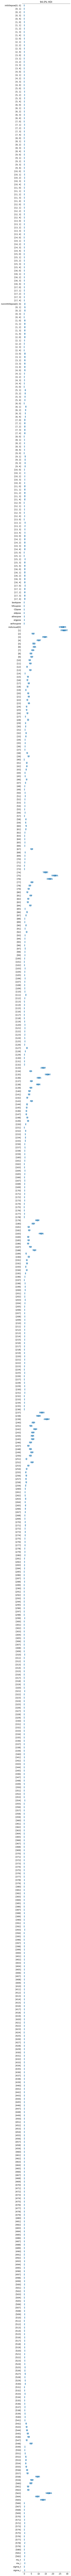

In [4]:
az.plot_forest(fit)

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([[<AxesSubplot:title={'center':'inttitlepow'}>,
        <AxesSubplot:title={'center':'inttitlepow'}>],
       [<AxesSubplot:title={'center':'noninttitlepow'}>,
        <AxesSubplot:title={'center':'noninttitlepow'}>],
       [<AxesSubplot:title={'center':'bookpow'}>,
        <AxesSubplot:title={'center':'bookpow'}>],
       [<AxesSubplot:title={'center':'hifuupow'}>,
        <AxesSubplot:title={'center':'hifuupow'}>],
       [<AxesSubplot:title={'center':'CDpow'}>,
        <AxesSubplot:title={'center':'CDpow'}>],
       [<AxesSubplot:title={'center':'oldpow'}>,
        <AxesSubplot:title={'center':'oldpow'}>],
       [<AxesSubplot:title={'center':'otherpow'}>,
        <AxesSubplot:title={'center':'otherpow'}>],
       [<AxesSubplot:title={'center':'orgpow'}>,
        <AxesSubplot:title={'center':'orgpow'}>],
       [<AxesSubplot:title={'center':'seihoupow'}>,
        <AxesSubplot:title={'center':'seihoupow'}>],
       [<AxesSubplot:title={'center':'indivisual'}>,
        <AxesSub

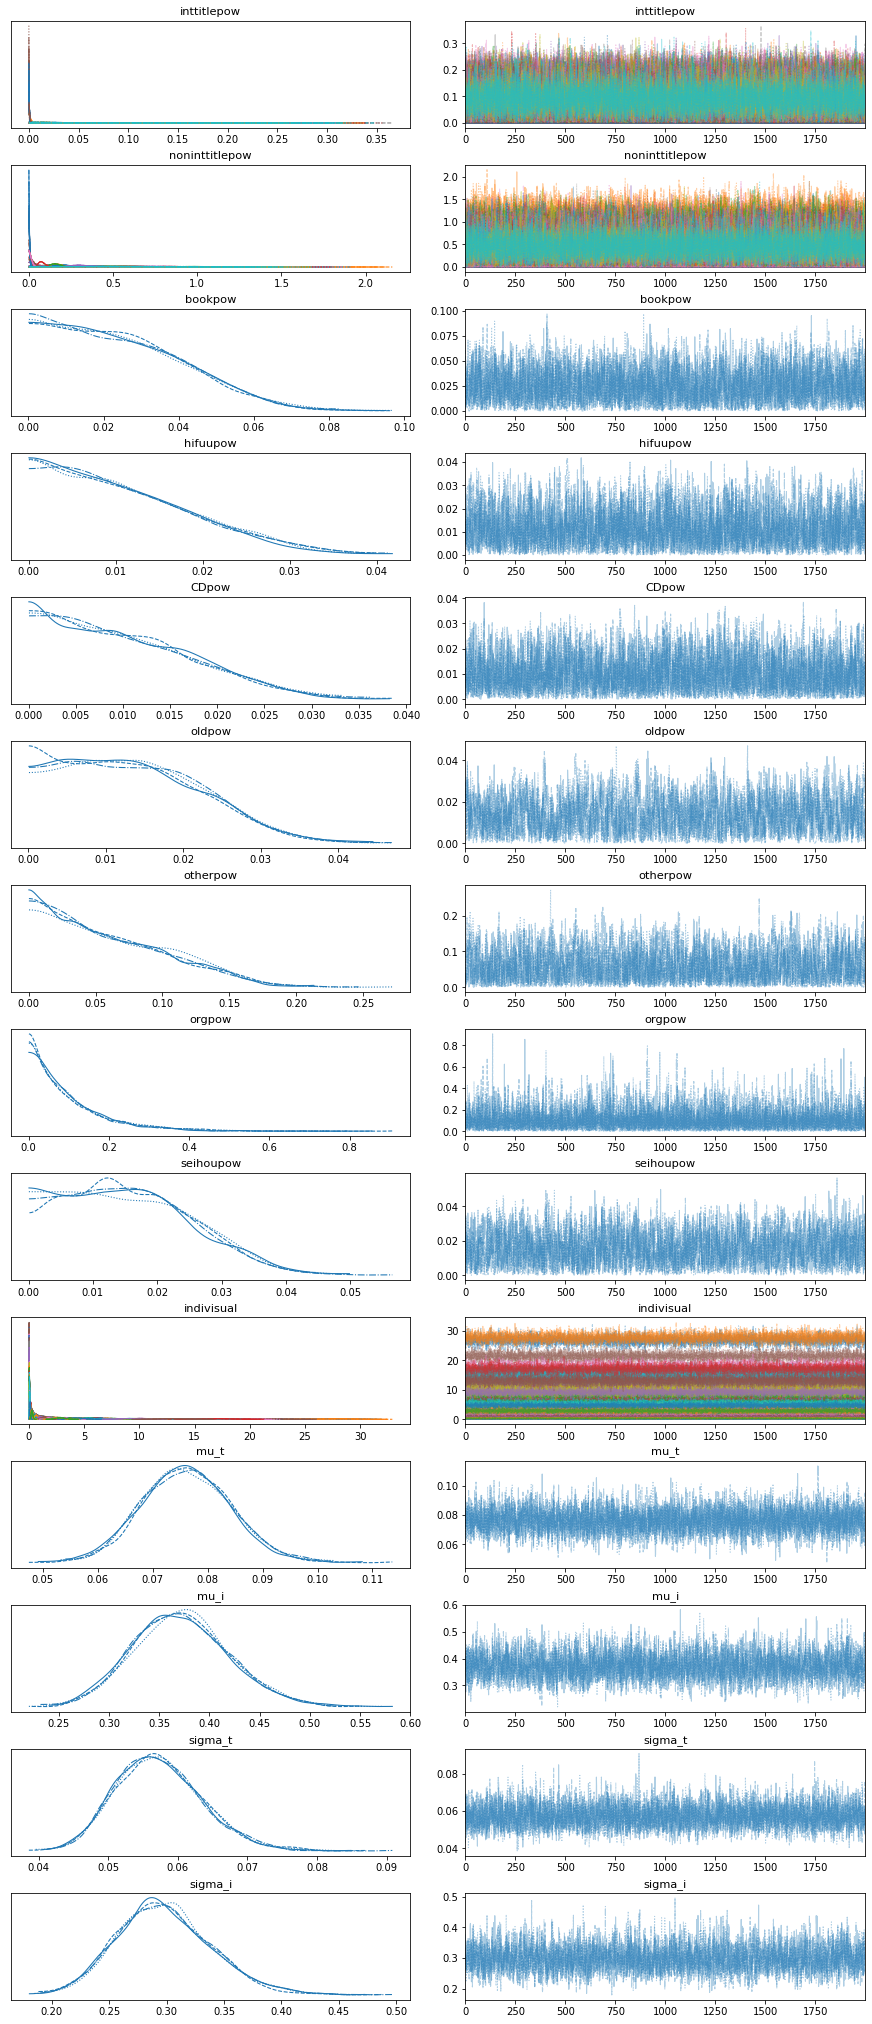

In [5]:
az.plot_trace(fit,backend_kwargs={"constrained_layout":True})

# 積和

In [4]:
with open('fit_music_sumprod.pkl', 'rb') as f:
    fit_sumprod= pickle.load(f)
    
summary_sumprod = az.summary(fit_sumprod)
print(summary_sumprod)

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


                    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
inttitlepow[0, 0]  0.056  0.008   0.042    0.071      0.000    0.000   
inttitlepow[0, 1]  0.063  0.008   0.048    0.077      0.000    0.000   
inttitlepow[0, 2]  0.058  0.007   0.046    0.071      0.000    0.000   
inttitlepow[0, 3]  0.080  0.009   0.064    0.096      0.001    0.000   
inttitlepow[0, 4]  0.134  0.013   0.111    0.159      0.001    0.001   
...                  ...    ...     ...      ...        ...      ...   
indivisual[582]    2.415  1.477   0.085    5.006      0.020    0.014   
mu_t               0.261  0.018   0.229    0.296      0.002    0.001   
mu_i               0.705  0.065   0.592    0.836      0.006    0.005   
sigma_t            0.071  0.007   0.057    0.085      0.001    0.000   
sigma_i            0.195  0.024   0.151    0.239      0.002    0.001   

                   ess_bulk  ess_tail  r_hat  
inttitlepow[0, 0]     415.0    1478.0   1.01  
inttitlepow[0, 1]     321.0    1276.0   1

In [ ]:
summary_sumprod.to_csv("data/summary_music_sumprod.csv")

In [5]:
summary_sumprod=summary_sumprod.filter(like='indivisual', axis=0)

music_points_ratio=pd.read_csv("data/music_point_ratio_sort.csv")

summary_sumprod["名前"]=music_points_ratio["Track Name"].values
summary_sumprod_sort=summary_sumprod.sort_values(by="mean")
summary_sumprod_sort


mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
indivisual[151]    0.010   0.003    0.006    0.015      0.000    0.000   
indivisual[282]    0.019   0.005    0.009    0.029      0.000    0.000   
indivisual[231]    0.026   0.007    0.014    0.039      0.000    0.000   
indivisual[236]    0.028   0.008    0.015    0.042      0.000    0.000   
indivisual[235]    0.030   0.008    0.016    0.045      0.000    0.000   
...                  ...     ...      ...      ...        ...      ...   
indivisual[337]   84.441   8.399   69.426  100.543      0.575    0.407   
indivisual[179]   87.094   9.565   69.316  105.171      0.746    0.528   
indivisual[183]  119.560  12.630   95.525  142.740      1.085    0.769   
indivisual[506]  132.243  18.375   99.147  167.009      0.931    0.659   
indivisual[10]   215.786  30.222  160.571  271.865      0.822    0.582   

                 ess_bulk  ess_tail  r_hat             名前  
indivisual[151]    1212.0    2735.0   1.00  Eternal Dream  
indivisual[282]    1772.0    3276.0   1.00          幻想の住人  
indivisual[231]    1438.0    4549.0   1.00         魂の休らむ所  
indivisual[236]    2176.0    4457.0   1.00       Peaceful  
indivisual[235]    1914.0    2659.0   1.00        Endless  
...                   ...       ...    ...            ...  
indivisual[337]     214.0     749.0   1.02           春の湊に  
indivisual[179]     164.0     377.0   1.01           風神少女  
indivisual[183]     134.0     250.0   1.01             砕月  
indivisual[506]     383.0    1088.0   1.00    今宵は飄逸なエゴイスト  
indivisual[10]     1297.0    2584.0   1.00    リーインカーネーション  

[583 rows x 10 columns]

In [6]:
fig = px.bar(summary_sumprod_sort, y='名前', x='mean',orientation="h", width=800, height=10000)
fig.show()


In [7]:
fig = px.bar(summary_sumprod_sort, y='名前', x='sd',orientation="h", width=800, height=10000)
fig.show()

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

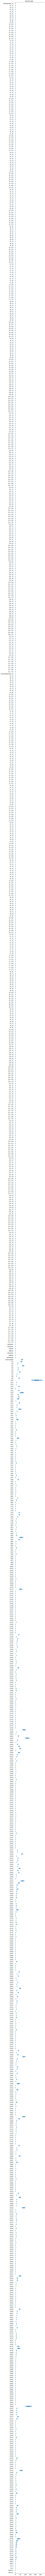

In [7]:
az.plot_forest(fit_sumprod)

/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.3.11py3 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/xiangze/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


array([[<AxesSubplot:title={'center':'inttitlepow'}>,
        <AxesSubplot:title={'center':'inttitlepow'}>],
       [<AxesSubplot:title={'center':'noninttitlepow'}>,
        <AxesSubplot:title={'center':'noninttitlepow'}>],
       [<AxesSubplot:title={'center':'bookpow'}>,
        <AxesSubplot:title={'center':'bookpow'}>],
       [<AxesSubplot:title={'center':'hifuupow'}>,
        <AxesSubplot:title={'center':'hifuupow'}>],
       [<AxesSubplot:title={'center':'CDpow'}>,
        <AxesSubplot:title={'center':'CDpow'}>],
       [<AxesSubplot:title={'center':'oldpow'}>,
        <AxesSubplot:title={'center':'oldpow'}>],
       [<AxesSubplot:title={'center':'otherpow'}>,
        <AxesSubplot:title={'center':'otherpow'}>],
       [<AxesSubplot:title={'center':'orgpow'}>,
        <AxesSubplot:title={'center':'orgpow'}>],
       [<AxesSubplot:title={'center':'seihoupow'}>,
        <AxesSubplot:title={'center':'seihoupow'}>],
       [<AxesSubplot:title={'center':'indivisual'}>,
        <AxesSub

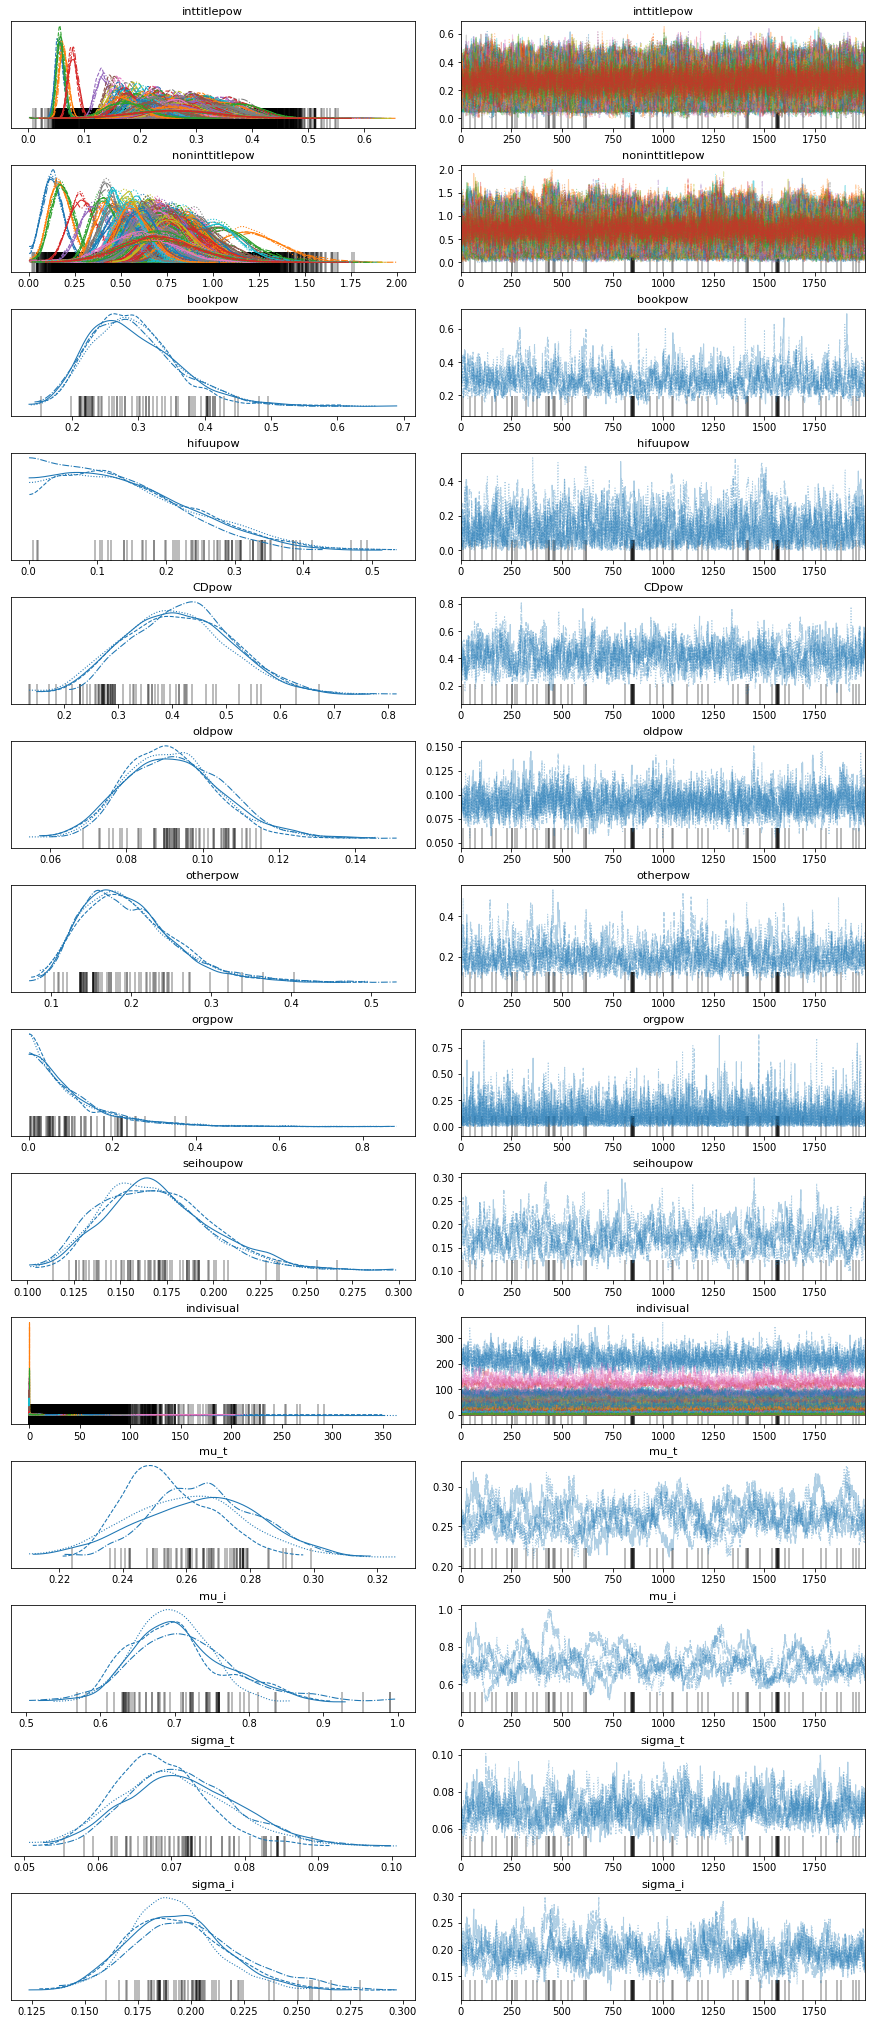

In [8]:
az.plot_trace(fit_sumprod,backend_kwargs={"constrained_layout":True})